# Libraries

## Essentials

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## My own scraping code

In [ ]:
from scraper.imdb import get_top_imdb_movies

# Dataset

In [3]:
URL = "https://www.imdb.com/chart/top/"
DF = get_top_imdb_movies(URL)

## What the data looks like

In [5]:
DF.head()

,Rank,Title,Year,Lead Actor,Supporting Actor,Director,Rating,Votes
0,1,The Shawshank Redemption,1994,Tim Robbins,Morgan Freeman,Frank Darabont,9.2,2307102
1,2,The Godfather,1972,Marlon Brando,Al Pacino,Francis Ford Coppola,9.1,1592236
2,3,The Godfather: Part II,1974,Al Pacino,Robert De Niro,Francis Ford Coppola,9.0,1112366
3,4,The Dark Knight,2008,Christian Bale,Heath Ledger,Christopher Nolan,9.0,2270171
4,5,12 Angry Men,1957,Henry Fonda,Lee J. Cobb,Sidney Lumet,8.9,678194


## Checking if there's missing inputs and datatypes of each features

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Rank              250 non-null    int64  
 1   Title             250 non-null    object 
 2   Year              250 non-null    int64  
 3   Lead Actor        250 non-null    object 
 4   Supporting Actor  250 non-null    object 
 5   Director          250 non-null    object 
 6   Rating            250 non-null    float64
 7   Votes             250 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 15.8+ KB


# Exploratory Data Analysis

## Oldest Movie in the list

In [38]:
MIN = DF["Year"].min()
DF[DF["Year"] == MIN]

,Rank,Title,Year,Lead Actor,Supporting Actor,Director,Rating,Votes
100,101,The Kid,1921,Charles Chaplin,Edna Purviance,Charles Chaplin,8.2,111165


## Newest Movie in the list

In [39]:
MAX = DF["Year"].max()
DF[DF["Year"] == MAX]

,Rank,Title,Year,Lead Actor,Supporting Actor,Director,Rating,Votes
47,48,Hamilton,2020,Lin-Manuel Miranda,Phillipa Soo,Thomas Kail,8.5,46663


## Looking on year-on-year

In [19]:
DF["Year"].value_counts().describe()

count    84.000000
mean      2.976190
std       1.769733
min       1.000000
25%       1.000000
50%       2.500000
75%       4.250000
max       8.000000
Name: Year, dtype: float64

- Majority the years have at least **4** movies belong in the list

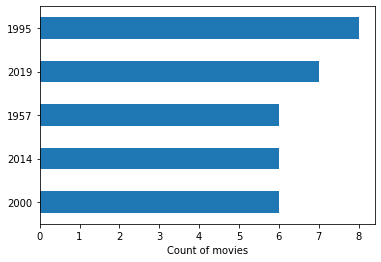

In [48]:
DF["Year"].value_counts().head(5)[::-1].plot.barh();

plt.xlabel("Count of movies");

- Year **1995** has the most number of movies belong in the list followed by **2019**

### Movies found in 1995

In [49]:
DF[DF["Year"] == 1995]

,Rank,Title,Year,Lead Actor,Supporting Actor,Director,Rating,Votes
19,20,Se7en,1995,Morgan Freeman,Brad Pitt,David Fincher,8.6,1421269
31,32,The Usual Suspects,1995,Kevin Spacey,Gabriel Byrne,Bryan Singer,8.5,978988
77,78,Braveheart,1995,Mel Gibson,Sophie Marceau,Mel Gibson,8.3,949300
80,81,Toy Story,1995,Tom Hanks,Tim Allen,John Lasseter,8.3,874611
122,123,Heat,1995,Al Pacino,Robert De Niro,Michael Mann,8.2,568716
138,139,Casino,1995,Robert De Niro,Sharon Stone,Martin Scorsese,8.2,459156
190,191,Before Sunrise,1995,Ethan Hawke,Julie Delpy,Richard Linklater,8.1,267014
226,227,La haine,1995,Vincent Cassel,Hubert Koundé,Mathieu Kassovitz,8.0,147194


### Movies found in 2019

In [50]:
DF[DF["Year"] == 2019]

,Rank,Title,Year,Lead Actor,Supporting Actor,Director,Rating,Votes
29,30,Gisaengchung,2019,Kang-ho Song,Sun-kyun Lee,Bong Joon Ho,8.5,507701
59,60,Joker,2019,Joaquin Phoenix,Robert De Niro,Todd Phillips,8.4,895806
74,75,Avengers: Endgame,2019,Robert Downey Jr.,Chris Evans,Anthony Russo,8.3,779963
97,98,1917,2019,Dean-Charles Chapman,George MacKay,Sam Mendes,8.2,389990
183,184,Klaus,2019,Jason Schwartzman,J.K. Simmons,Sergio Pablos,8.1,79027
201,202,Ford v Ferrari,2019,Matt Damon,Christian Bale,James Mangold,8.1,272676
237,238,Portrait de la jeune fille en feu,2019,Noémie Merlant,Adèle Haenel,Céline Sciamma,8.0,56024


## Qualification to be included in the list

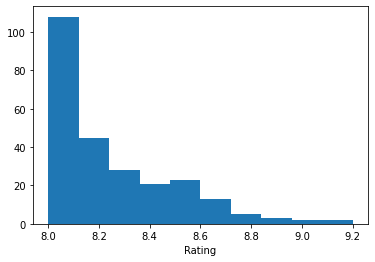

In [106]:
DF["Rating"].hist(grid=False)

plt.xlabel("Rating");

In [96]:
DF["Votes"].describe()

count    2.500000e+02
mean     5.353498e+05
std      4.569996e+05
min      2.604000e+04
25%      1.572238e+05
50%      3.897050e+05
75%      8.011715e+05
max      2.307102e+06
Name: Votes, dtype: float64

## Decade by decade volume comparison of top movies

In [98]:
pd.cut(DF["Year"],np.arange(1920, 2040, step=10),labels=np.arange(1920, 2040, step=10).tolist()[:-1])\
.value_counts()\
.sort_index()

1920     7
1930     8
1940    11
1950    22
1960    16
1970    22
1980    26
1990    45
2000    46
2010    47
2020     0
Name: Year, dtype: int64

In [103]:
ax.get_xticklabels()[0].set_text("sad")

In [104]:
ax.get_xticklabels()[0]

Text(-2.0, 0, 'sad')

[Text(-2.0, 0, '2010'),
 Text(0.0, 0, '1920'),
 Text(2.0, 0, '1940'),
 Text(4.0, 0, '1960'),
 Text(6.0, 0, '1980'),
 Text(8.0, 0, '2000'),
 Text(10.0, 0, '2020'),
 Text(12.0, 0, '')]

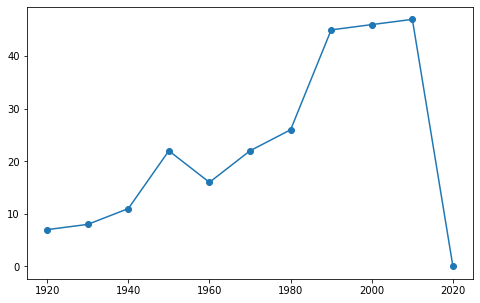

In [97]:
fig, ax = plt.subplots(1,1,figsize=(8,5))

pd.cut(DF["Year"],np.arange(1920, 2040, step=10),labels=np.arange(1920, 2040, step=10).tolist()[:-1])\
.value_counts()\
.sort_index().plot.line(ax=ax, marker="o");

ax.get_xticklabels()

## Most appearance of an actor in the list

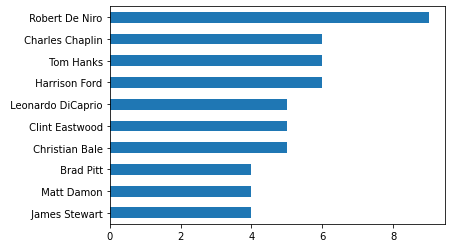

In [54]:
DF["Lead Actor"].append(DF["Supporting Actor"]).value_counts().head(10)[::-1].plot.barh();

## Best director in the list

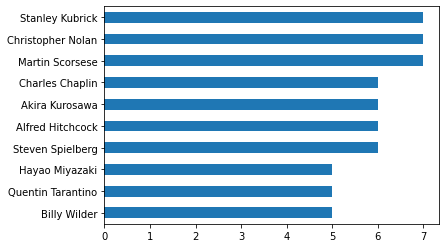

In [59]:
DF["Director"].value_counts().head(10)[::-1].plot.barh();